In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/MLops/"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("insurance_company_modified.csv")
df

,33,1,3,2,8,0,5,1.1,3.1,7,...,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45,mixed_type_col
0,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0,108
1,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
2,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904
3,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad
4,23.0,1.0,2.0,1.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932,NaN,1.0,2.0,2.0,5.0,0.0,4.0,2.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,687
5933,41.0,449.0,3.0,3.0,10.0,0.0,4.0,1.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5934,2.0,1.0,2.0,3.0,1.0,1.0,5.0,1.0,3.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5935,8.0,1.0,2.0,4.0,2.0,0.0,4.0,0.0,5.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,573


In [5]:
print("Dimensiones:", df.shape)
print("\nTipos de datos:\n", df.dtypes.value_counts())

Dimensiones: (5937, 87)

Tipos de datos:
 object    87
Name: count, dtype: int64


In [6]:
print("\nPrimeras filas:")
df.head()


Primeras filas:


,33,1,3,2,8,0,5,1.1,3.1,7,...,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45,mixed_type_col
0,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0,108
1,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
2,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904
3,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad
4,23.0,1.0,2.0,1.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271


In [7]:
df.describe(include='all').T

,count,unique,top,freq
33,5869,154,33.0,768
1,5864,81,1.0,4953
3,5873,75,3.0,2513
2,5868,85,3.0,2806
8,5877,79,8.0,1478
...,...,...,...,...
0.42,5889,42,0.0,5415
0.43,5876,40,0.0,5523
0.44,5875,39,0.0,5444
0.45,5858,31,0.0,5173


Removemos la ultima columna que no contiene datos relevantes para el análisis

In [8]:
df = df.iloc[:, :-1]

In [9]:
df.head(1)

,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45
0,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0


Los encabezados al parecer son valores entonces se recorrerán como una primera fila y se asignarán encabezados según el dataset

In [10]:
first_row = df.columns.tolist()

df.loc[-1] = first_row  # insertar la fila al principio
df.index = df.index + 1  # reajustar índices
df = df.sort_index().reset_index(drop=True)

/tmp/ipython-input-4232659363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[-1] = first_row  # insertar la fila al principio


In [11]:
df.head()

,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
column_names = [
    "MOSTYPE", "MAANTHUI", "MGEMOMV", "MGEMLEEF", "MOSHOOFD", "MGODRK", "MGODPR",
    "MGODOV", "MGODGE", "MRELGE", "MRELSA", "MRELOV", "MFALLEEN", "MFGEKIND",
    "MFWEKIND", "MOPLHOOG", "MOPLMIDD", "MOPLLAAG", "MBERHOOG", "MBERZELF",
    "MBERBOER", "MBERMIDD", "MBERARBG", "MBERARBO", "MSKA", "MSKB1", "MSKB2",
    "MSKC", "MSKD", "MHHUUR", "MHKOOP", "MAUT1", "MAUT2", "MAUT0", "MZFONDS",
    "MZPART", "MINKM30", "MINK3045", "MINK4575", "MINK7512", "MINK123M",
    "MINKGEM", "MKOOPKLA", "PWAPART", "PWABEDR", "PWALAND", "PPERSAUT",
    "PBESAUT", "PMOTSCO", "PVRAAUT", "PAANHANG", "PTRACTOR", "PWERKT", "PBROM",
    "PLEVEN", "PPERSONG", "PGEZONG", "PWAOREG", "PBRAND", "PZEILPL", "PPLEZIER",
    "PFIETS", "PINBOED", "PBYSTAND", "AWAPART", "AWABEDR", "AWALAND", "APERSAUT",
    "ABESAUT", "AMOTSCO", "AVRAAUT", "AAANHANG", "ATRACTOR", "AWERKT", "ABROM",
    "ALEVEN", "APERSONG", "AGEZONG", "AWAOREG", "ABRAND", "AZEILPL", "APLEZIER",
    "AFIETS", "AINBOED", "ABYSTAND", "CARAVAN"]


In [13]:
df.columns = column_names[:df.shape[1]]

In [14]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Cambiamos a valores numéricos

In [15]:
conversion_errors = {}

for col in df.columns:
    if df[col].dtype == 'object':
        # Intentar convertir y registrar los valores que no se pueden parsear
        errores = df[~df[col].astype(str).str.replace('.', '', 1).str.isnumeric()][col].unique()
        if len(errores) > 0:
            conversion_errors[col] = errores
        df[col] = pd.to_numeric(df[col], errors='coerce')  # convierte a número o NaN



In [16]:
df

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33.0,1.0,3.0,2.0,8.0,0.0,5.0,1.1,3.1,7.0,...,0.37,0.38,0.39,1.13,0.4,0.41,0.42,0.43,0.44,0.45
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,NaN,4.0,6.0,...,0.00,0.00,0.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,NaN,1.0,2.0,2.0,5.0,0.0,4.0,2.0,4.0,0.0,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
5934,41.0,449.0,3.0,3.0,10.0,0.0,4.0,1.0,4.0,7.0,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
5935,2.0,1.0,2.0,3.0,1.0,1.0,5.0,1.0,3.0,5.0,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
5936,8.0,1.0,2.0,4.0,2.0,0.0,4.0,0.0,5.0,7.0,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00


In [17]:
# duplicados = df.duplicated().sum()
# print("Filas duplicadas:", duplicados)

# if duplicados > 0:
#     df = df.drop_duplicates().reset_index(drop=True)

Aseguramos que la variable objetivo contenga valores entre 0 y 1

In [18]:
df = df[df["CARAVAN"].isin([0, 1])].copy()

In [19]:
df.shape

(5806, 86)

In [20]:
last_column = df.columns[-1]
print(f"Última columna: {last_column}")

# Contar valores únicos
print("\nDistribución de valores:")
print(df[last_column].value_counts(dropna=False))

# Verificar si solo contiene 0 o 1
unique_values = df[last_column].unique()
if set(unique_values).issubset({0, 1}):
    print("\nLa variable objetivo solo contiene 0 y 1.")
else:
    print("\nLa variable objetivo tiene valores diferentes a 0 o 1:")
    print(unique_values)

Última columna: CARAVAN

Distribución de valores:
CARAVAN
0.0    5455
1.0     351
Name: count, dtype: int64

La variable objetivo solo contiene 0 y 1.


In [21]:
df

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,NaN,4.0,6.0,...,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,23.0,1.0,2.0,1.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,NaN,1.0,2.0,2.0,5.0,0.0,4.0,2.0,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5934,41.0,449.0,3.0,3.0,10.0,0.0,4.0,1.0,4.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5935,2.0,1.0,2.0,3.0,1.0,1.0,5.0,1.0,3.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5936,8.0,1.0,2.0,4.0,2.0,0.0,4.0,0.0,5.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Corrigiendo Outliers

In [22]:
#Rangos para corregir outliers en columnas correspondientes
valid_ranges = {
    "MAANTHUI": (1, 10),   # número de casas
    "MGEMOMV": (1, 6),     # tamaño de hogar
}

def replace_outliers(df, col, min, max):
    fuera = (df[col] < min) | (df[col] > max)
    if fuera.sum() > 0:
        print(f"{col}: {fuera.sum()} valores fuera de rango. Reemplazados por la mediana ({df[col].median()}).")
        df.loc[fuera, col] = df[col].median()


for col, (min, max) in valid_ranges.items():
    if col in df.columns:
        replace_outliers(df, col, min, max)

for col in valid_ranges.keys():
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)



MAANTHUI: 66 valores fuera de rango. Reemplazados por la mediana (1.0).
MGEMOMV: 60 valores fuera de rango. Reemplazados por la mediana (3.0).


/tmp/ipython-input-1475273788.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


#EDA

In [23]:
df.shape

(5806, 86)

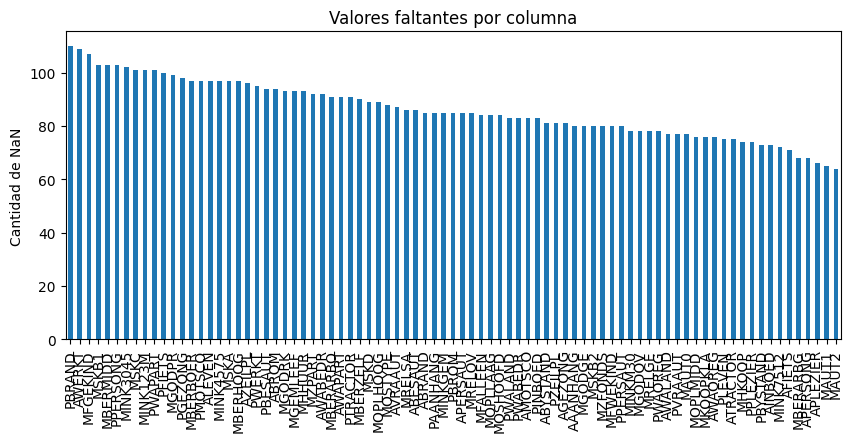

In [24]:
import matplotlib.pyplot as plt

missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,4))
missing.plot(kind='bar')
plt.title("Valores faltantes por columna")
plt.ylabel("Cantidad de NaN")
plt.show()

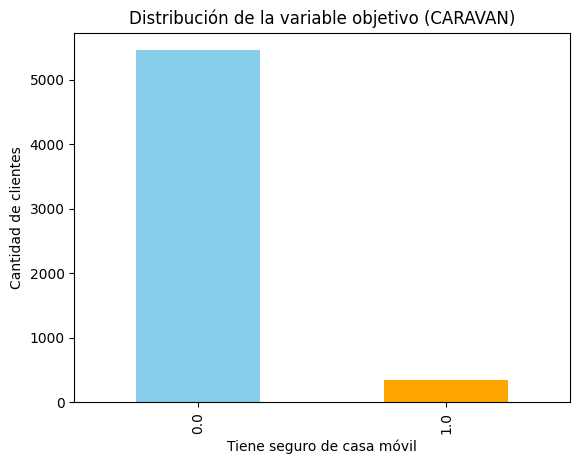

CARAVAN
0.0    0.939545
1.0    0.060455
Name: proportion, dtype: float64


In [25]:
df["CARAVAN"].value_counts().plot(kind="bar", color=["skyblue", "orange"])
plt.title("Distribución de la variable objetivo (CARAVAN)")
plt.xlabel("Tiene seguro de casa móvil")
plt.ylabel("Cantidad de clientes")
plt.show()

print(df["CARAVAN"].value_counts(normalize=True))

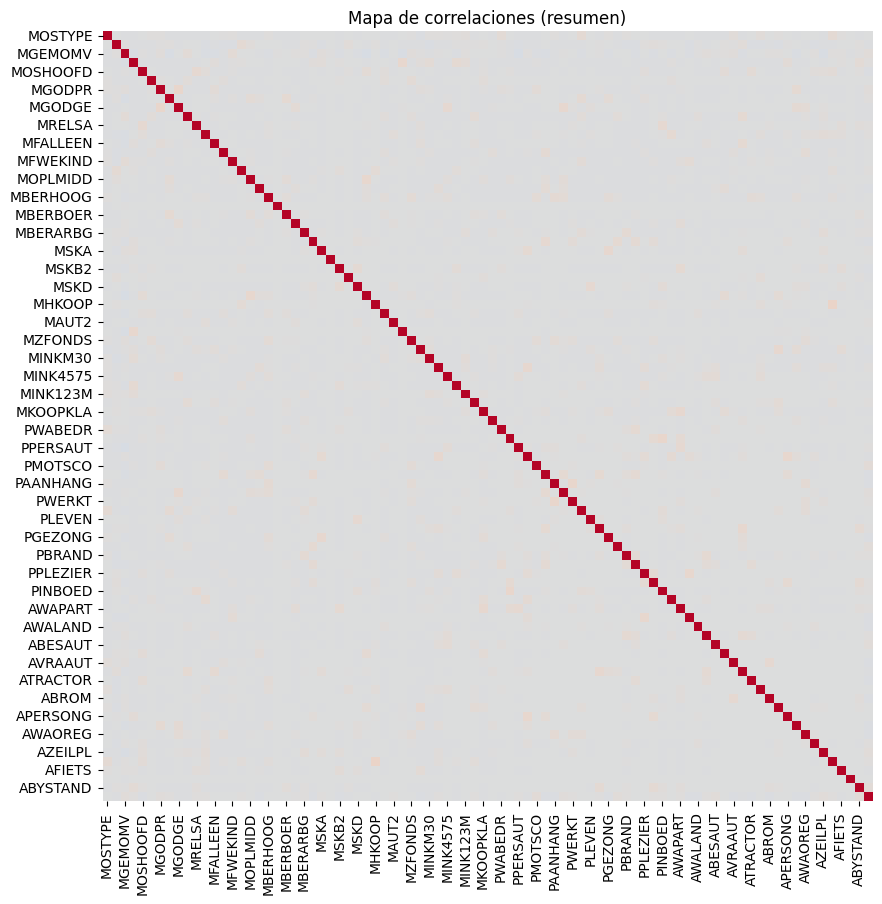

Top variables más correlacionadas con CARAVAN:
CARAVAN     1.000000
ABYSTAND    0.037417
PMOTSCO     0.034143
MGEMOMV     0.031507
PWAOREG     0.031363
ABESAUT     0.030401
AZEILPL     0.025163
PTRACTOR    0.020587
MGODPR      0.016285
MINKGEM     0.015271
Name: CARAVAN, dtype: float64


In [26]:
import seaborn as sns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, cbar=False)
plt.title("Mapa de correlaciones (resumen)")
plt.show()

corr_target = corr["CARAVAN"].sort_values(ascending=False)
print("Top variables más correlacionadas con CARAVAN:")
print(corr_target.head(10))

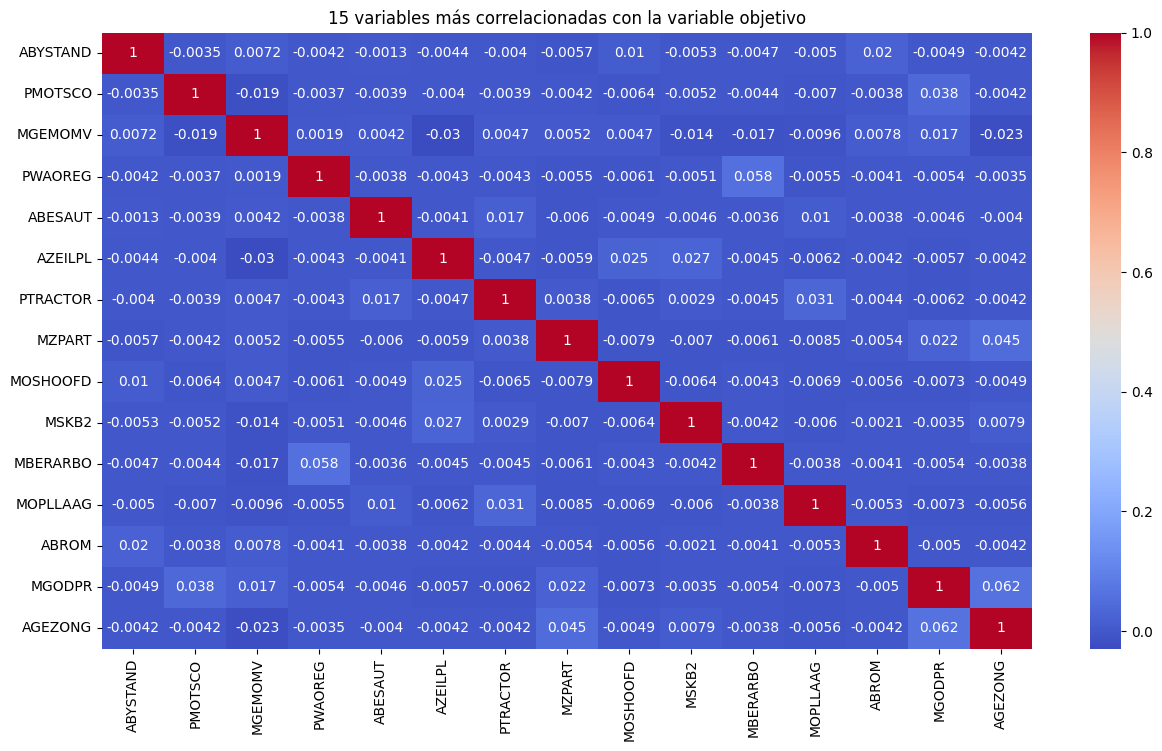

In [27]:
top_corr = corr["CARAVAN"].abs().sort_values(ascending=False)[1:16]
top_cols = top_corr.index

plt.figure(figsize=(15,8))
sns.heatmap(df[top_cols].corr(), annot=True, cmap="coolwarm")
plt.title("15 variables más correlacionadas con la variable objetivo")
plt.show()